In [47]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

import eight_queens

In [95]:

def run_ga(g, n, k, m, e):
    """
    Executa o algoritmo genético e retorna o indivíduo com o menor número de ataques entre rainhas
    :param g:int - numero de gerações
    :param n:int - numero de individuos
    :param k:int - numero de participantes do torneio
    :param m:float - probabilidade de mutação (entre 0 e 1, inclusive)
    :param e:int - número de indivíduos no elitismo
    :return:list - melhor individuo encontrado
    """
    def select_parent(population):
      """
        Seleciona dois individuos de uma populacao
        :param population: lista com os individuos
        :return: 2 individuos (listas de 8 elementos)
      """
      p1 = random.choice(population)
      p2 = random.choice(population)
      return p1,p2
    
    def best_worst_avg(population):
      """
        Recebe uma lista de individuos e retorna seu melhor valor,pior valor e a media dos valores
        :param population: lista com os individuos
        :return: triplet com melhor,pior, e media dos valores da populacao
      """
      smallest, biggest, sums = float("inf"), -float("inf"), 0
      for individual in population:
        value = eight_queens.evaluate(individual)
        smallest = value if value < smallest else smallest
        biggest =  value if value > biggest else biggest
        sums += value
      return smallest,biggest,sums/len(population)

    
    numbers = range(1,9)
    participants = [random.choices(numbers,k=8) for _ in range(n)]
    graph_data= []
    # Tradução dos slides
    # https://docs.google.com/presentation/d/10iKeCsGLVC6qFJhJMD-qBNlNSKr5CyYjFzsrsnKLcYU/edit#slide=id.g1afaeddd4a2_0_136
    for _ in range(g):
      graph_data.append(best_worst_avg(participants))
    
      diversity = sum(1 for i in range(len(participants)) if len(set(eight_queens.evaluate(individual) for individual in participants)) > 1)
      mr = max(MIN_MUTATION_RATE, min(MAX_MUTATION_RATE, m * (1 + (diversity / graph_data[-1][2]))))
    
      p = []
      while len(p) < e:
        p.append(eight_queens.tournament(participants))
        p1, p2 = select_parent(p)
        o1,o2 = eight_queens.crossover(p1,p2,3)
        o1 = eight_queens.mutate(o1,mr); o2 = eight_queens.mutate(o2,mr)
        p.append(o1);p.append(o2)

      participants += p


    return eight_queens.tournament(participants), graph_data
#best, graph_data = run_ga(100, 60, 20, 0.2, 10)


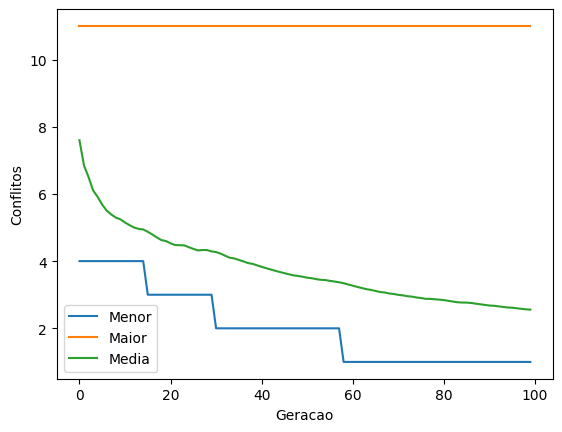

[6, 1, 5, 2, 5, 3, 8, 4] 1.0


In [109]:
# AJUSTAR PARAMETROS

"""
    :param g:int - numero de gerações: alto pra permitir convergencia
    :param n:int - numero de individuos: n: search space
    :param k:int - numero de participantes do torneio: grande suficiente pra manter diversitade e evitar convergencia prematura
    :param m:float - probabilidade de mutação (entre 0 e 1, inclusive):impede convergencia prematura mas atrasa a convergencia. implementei uma adaptativa
    :param e:int - número de indivíduos no elitismo: e: baixo pra evitar perda de boas solucoes
    :return:list - melhor individuo encontrado

    """
best, graph_data = run_ga(100, 10, 4, 0.3, 2)

# Plota o grafico
triplets = graph_data
x = range(len(triplets))
y1 = [t[0] for t in triplets]
y2 = [t[1] for t in triplets]
y3 = [t[2] for t in triplets]

plt.plot(x, y1, label='Menor')
plt.plot(x, y2, label='Maior')
plt.plot(x, y3, label='Media')

plt.xlabel('Geracao')
plt.ylabel('Conflitos')
plt.title('')
plt.legend()
plt.show()
print(best,eight_queens.evaluate(best))